In [136]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import sklearn.datasets as dt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve

In [137]:
DS = dt.load_breast_cancer()
print(DS.DESCR)

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

target shape:  (569,)
data shape:  (569, 30)
num of ones:  357
num of zeros:  212


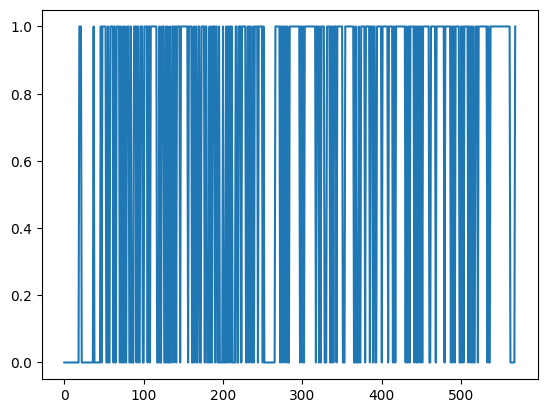

In [138]:
data = DS.data
target = DS.target
print("target shape: ",target.shape)
print("data shape: ",data.shape)

print("num of ones: ", np.sum(target))
print("num of zeros: ", len(target[target == 0]))

plt.plot(target)

In [139]:
# Switch ones with zeros

target_swi = np.abs(target - 1)

print("num of ones: ", np.sum(target_swi))
print("num of zeros: ", len(target_swi[target_swi == 0]))

num of ones:  212
num of zeros:  357


[[ 7.42870603e-01  3.58503497e-01 -2.68941100e-01  2.50605051e-02
  -1.12483267e-01 -2.07612610e-01 -2.98061816e-01 -1.55383232e-01
  -2.48501804e-01 -3.14530158e-02 -2.60923241e-02  1.24238676e+00
   5.35924986e-01 -1.72238052e-01 -1.31632887e-02 -4.44812894e-03
  -2.69900457e-02 -2.38657722e-02 -4.33223117e-02  5.59426752e-04
   2.44214492e-02 -5.81889262e-01 -2.47560837e-01 -2.90171896e-03
  -2.16446575e-01 -6.33970377e-01 -8.31689979e-01 -3.95054057e-01
  -6.88201876e-01 -8.29510597e-02]]
(1, 30)
[ 7.42870603e-01  3.58503497e-01 -2.68941100e-01  2.50605051e-02
 -1.12483267e-01 -2.07612610e-01 -2.98061816e-01 -1.55383232e-01
 -2.48501804e-01 -3.14530158e-02 -2.60923241e-02  1.24238676e+00
  5.35924986e-01 -1.72238052e-01 -1.31632887e-02 -4.44812894e-03
 -2.69900457e-02 -2.38657722e-02 -4.33223117e-02  5.59426752e-04
  2.44214492e-02 -5.81889262e-01 -2.47560837e-01 -2.90171896e-03
 -2.16446575e-01 -6.33970377e-01 -8.31689979e-01 -3.95054057e-01
 -6.88201876e-01 -8.29510597e-02]
(30,)

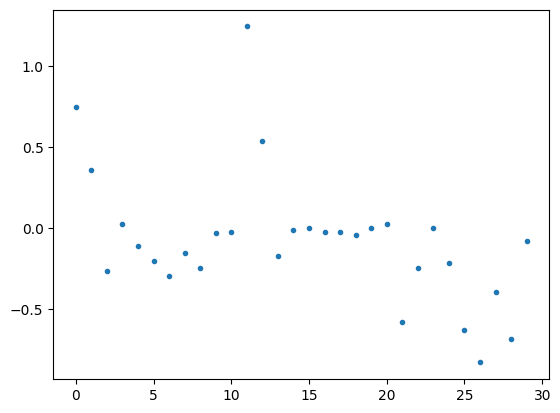

In [140]:
X1, X2, y1, y2 = train_test_split(data, target, test_size=1/3, stratify=target)

lr = LogisticRegression(max_iter=5000).fit(X1, y1)

coef = lr.coef_
print(coef)
print(coef.shape)

coef = coef.squeeze()
print(coef)
print(coef.shape)

plt.plot(coef, '.')

In [141]:
y2e = lr.predict(X2)

print(confusion_matrix(y2, y2e))

print("Erros: ",np.sum(y2 != y2e))

[[ 64   7]
 [  6 113]]
Erros:  13


In [142]:
print(classification_report(y2,y2e))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91        71
           1       0.94      0.95      0.95       119

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190



In [143]:
y2d = lr.decision_function(X2)
print(y2d.shape)
print(y2d[:10],"...")

print(confusion_matrix(y2, y2d>=-1)) # Ajustar o limiar de decisão

(190,)
[  8.35182385 -17.58693748  -1.3816908   13.42429601   1.28907514
 -22.57850666   2.64048587   7.02947524   0.38090945  -4.88009006] ...
[[ 61  10]
 [  5 114]]


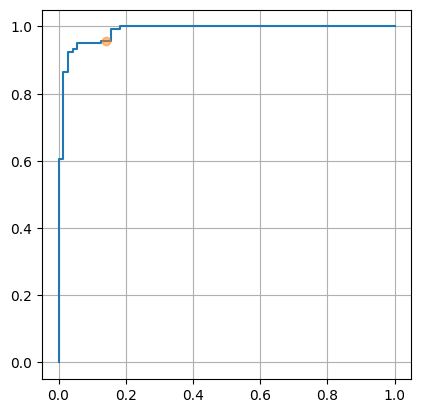

In [151]:
fp, tp, t = roc_curve(y2, y2d)

plt.plot(fp, tp)
plt.plot(10/71, 114/119, 'o', alpha=.5)
plt.axis('scaled')
plt.grid(True)

plt.show()

[-6.32158421e+01 -3.53446958e+01 -3.40988005e+01 -3.38419315e+01
 -3.30679989e+01 -2.69134066e+01 -2.51219155e+01 -2.44687364e+01
 -2.27905143e+01 -2.25785067e+01 -2.22715394e+01 -2.05557389e+01
 -1.88616094e+01 -1.75869375e+01 -1.72373524e+01 -1.68536460e+01
 -1.51131458e+01 -1.49443339e+01 -1.44083615e+01 -1.40519472e+01
 -1.39199988e+01 -1.38629057e+01 -1.32292061e+01 -1.31904334e+01
 -1.28699570e+01 -1.22725574e+01 -1.21534966e+01 -1.19315822e+01
 -1.17523810e+01 -1.15353273e+01 -1.13858873e+01 -1.09934093e+01
 -1.09168605e+01 -1.05983529e+01 -9.61869419e+00 -9.55301652e+00
 -8.95814314e+00 -8.80829176e+00 -8.32356277e+00 -8.13367608e+00
 -8.10688535e+00 -7.81049938e+00 -6.96249339e+00 -6.83545107e+00
 -6.51395879e+00 -6.31833056e+00 -6.29296846e+00 -5.84197705e+00
 -4.88009006e+00 -4.83428353e+00 -4.53245272e+00 -4.50116413e+00
 -4.12742689e+00 -4.10982480e+00 -3.35820451e+00 -2.99828760e+00
 -2.93763077e+00 -2.77715965e+00 -2.01418474e+00 -1.95099131e+00
 -1.78194889e+00 -1.38169

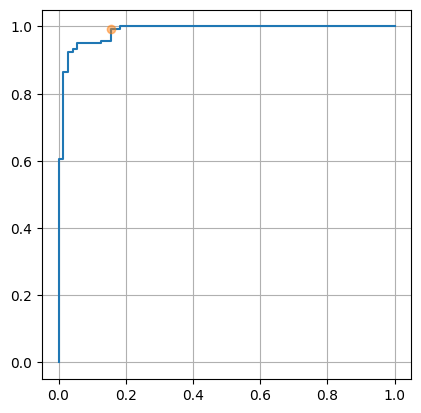

In [149]:
print(t)
print(tp)

print(confusion_matrix(y2, y2d>=-1.54))

plt.plot(fp, tp)
plt.plot(11/71, 118/119, 'o', alpha=.5)
plt.axis('scaled')
plt.grid(True)

plt.show()

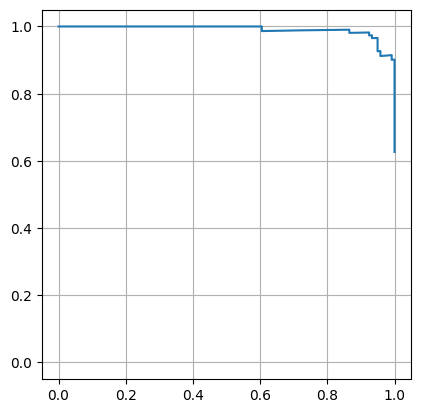

In [146]:
pr, rc, t = precision_recall_curve(y2, y2d)

plt.plot(rc, pr)
plt.axis('scaled')
plt.axis([-0.05, 1.05, -0.05, 1.05])
plt.grid(True)

plt.show()

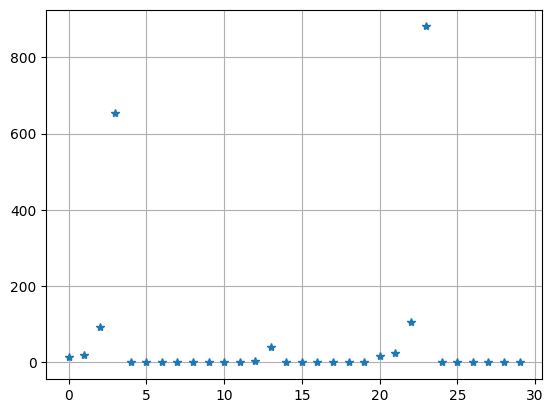

In [147]:
media = np.mean(data, axis=0)

plt.plot(media, '*')
plt.grid(True)

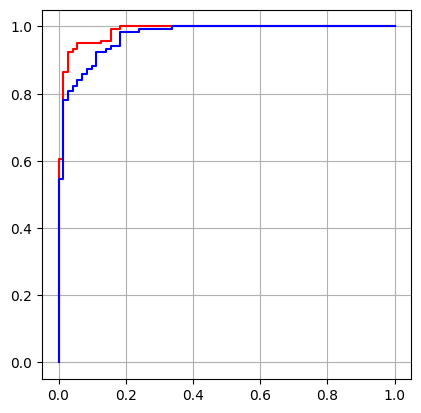

Vermelha (Regressão linear) é melhor


In [161]:
from sklearn.svm import SVC

svm = SVC().fit(X1, y1)
y2c = svm.decision_function(X2)
fp2, tp2, t2 = roc_curve(y2,y2c)

# Comparar ambas as curvas ROC

plt.plot(fp, tp, 'r')
plt.plot(fp2, tp2, 'b')
plt.axis('scaled')
plt.axis([-0.05, 1.05, -0.05, 1.05])
plt.grid(True)

plt.show()
print("Vermelha (Regressão linear) é melhor")

In [167]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X1, y1)
y2b = rf.predict_proba(X2)
print(y2b.shape)
print(y2b[:10, :])

(190, 2)
[[0.05 0.95]
 [1.   0.  ]
 [0.72 0.28]
 [0.   1.  ]
 [0.42 0.58]
 [1.   0.  ]
 [0.84 0.16]
 [0.01 0.99]
 [0.41 0.59]
 [0.83 0.17]]


In [169]:
y2e = rf.predict(X2)
print(confusion_matrix(y2, y2e))

p = y2b[:,1]

print(confusion_matrix(y2, p>=0.5))

[[ 66   5]
 [  6 113]]
[[ 66   5]
 [  6 113]]


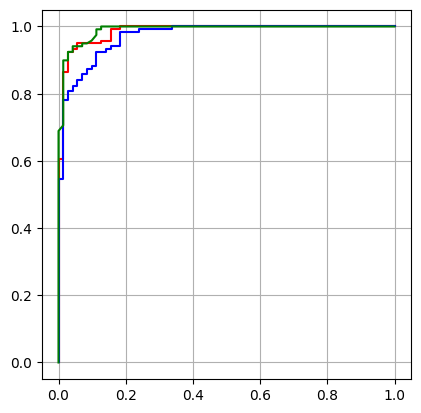

In [170]:
fp3, tp3, t3 = roc_curve(y2,p)

plt.plot(fp, tp, 'r')
plt.plot(fp2, tp2, 'b')
plt.plot(fp3, tp3, 'g')
plt.axis('scaled')
plt.axis([-0.05, 1.05, -0.05, 1.05])
plt.grid(True)

plt.show()